# TRABAJO APRENDIZAJE AUTOMÁTICO

Guzmán Muñoz Revuelta

Fernando Caruana del Pino

## OBJETIVOS DEL TRABAJO:
En este segundo trabajo, simularemos un "business case" con nuestra base de datos 'Base', donde la variable target es la de 'fraud_bool', que indica el número de fraudes que hay en el dataframe. En este trabajo crearemos un DICCIONARIO DE VARIABLES, en primer lugar las variables originales (raw) y procesadas. En este paso se intentará sacar valor de las variables. La evaluación de este modelo no es una tarea fácil, por lo que se varias realizarán métricas para observar su desempeño:

* **FEATURE ENGINEERING y SELECCIÓN DE VARIABLES:** proceso de ML que consiste en la creación y selección de características para mejorar el rendimiento de nuestro modelo predictivo. Para ello, se tratarán las variables relevantes para su correcto uso. Por ejemplo, cambiaremos el formato de las fechas de str (2019-01-01) a datetime.

* **MODELAJE DE LAS VARIABLES:** en este apartado se realizarán diferentes modelos como pueden ser árboles de decisión, Bayes o GLM. Además, en el modelo base se imputa la clase mayoritaria, como hicimos en nuestra práctica de Titanic.

* **MÉTRICA:** matriz de confusión (absolutos y relativos %), curva ROC, curva de Ganancia, curva Lift (parecida a la curva de Ganancia pero expresada en otra forma), F1, etc. 

En resumen, nuestro objetivo es convertir nuestra base, desde la transformación de datos a hasta la construcción de modelos variados, respaldado por una evaluación exhaustiva que nos permita entender el trabajo realizado.


# Variables
• income (numeric): Annual income of the applicant (in decile form). Ranges between [0.1, 0.9].

• name_email_similarity (numeric): Metric of similarity between email and applicant’s name. Higher values represent higher similarity. Ranges between [0, 1].

• prev_address_months_count (numeric): Number of months in previous registered address of the applicant, i.e. the applicant’s previous residence, if applicable. Ranges between [−1, 380] months (-1 is a missing value).

• current_address_months_count (numeric): Months in currently registered address of the applicant. Ranges between [−1, 429] months (-1 is a missing value).

• customer_age (numeric): Applicant’s age in years, rounded to the decade. Ranges between [10, 90] years.

• days_since_request (numeric): Number of days passed since application was done. Ranges between [0, 79] days.

• intended_balcon_amount (numeric): Initial transferred amount for application. Ranges between [−16, 114] (negatives are missing values).

• payment_type (categorical): Credit payment plan type. 5 possible (annonymized) values.

• zip_count_4w (numeric): Number of applications within same zip code in last 4 weeks. Ranges between [1, 6830].

• velocity_6h (numeric): Velocity of total applications made in last 6 hours i.e., average number of applications per hour in the last 6 hours. Ranges between [−175, 16818].

• velocity_24h (numeric): Velocity of total applications made in last 24 hours i.e., average number of applications per hour in the last 24 hours. Ranges between [1297, 9586]

• velocity_4w (numeric): Velocity of total applications made in last 4 weeks, i.e., average number of applications per hour in the last 4 weeks. Ranges between [2825, 7020].

• bank_branch_count_8w (numeric): Number of total applications in the selected bank branch in last 8 weeks. Ranges between [0, 2404].

• date_of_birth_distinct_emails_4w (numeric): Number of emails for applicants with same date of birth in last 4 weeks. Ranges between [0, 39].

• employment_status (categorical): Employment status of the applicant. 7 possible (annonymized) values.

• credit_risk_score (numeric): Internal score of application risk. Ranges between [−191, 389].

• email_is_free (binary): Domain of application email (either free or paid).

• housing_status (categorical): Current residential status for applicant. 7 possible (annonymized) values.

• phone_home_valid (binary): Validity of provided home phone.

• phone_mobile_valid (binary): Validity of provided mobile phone.

• bank_months_count (numeric): How old is previous account (if held) in months. Ranges between [−1, 32] months (-1 is a missing value).

• has_other_cards (binary): If applicant has other cards from the same banking company.

• proposed_credit_limit (numeric): Applicant’s proposed credit limit. Ranges between [200, 2000].

• foreign_request (binary): If origin country of request is different from bank’s country.

• source (categorical): Online source of application. Either browser (INTERNET) or app (TELEAPP).

• session_length_in_minutes (numeric): Length of user session in banking website in minutes. Ranges between [−1, 107] minutes (-1 is a missing value).

• device_os (categorical): Operative system of device that made request. Possible values are: Windows, macOS, Linux, X11, or other.

• keep_alive_session (binary): User option on session logout.

• device_distinct_emails (numeric): Number of distinct emails in banking website from the used device in last 8 weeks. Ranges between [−1, 2] emails (-1 is a missing value).

• device_fraud_count (numeric): Number of fraudulent applications with used device. Ranges between [0, 1].

• month (numeric): Month where the application was made. Ranges between [0, 7].

• fraud_bool (binary): If the application is fraudulent or not.

# <font color = 'lightgreen'> FEATURE ENGINEERING & SELECCIÓN DE VARIABLES

La primera parte de este trabajo consiste en la selección óptima de variables, donde se escogerán automáticamente las características de los datos que más contribuyen a la variable objetivo. Además, tenemos que trabajar solo con las variables más representativas, ya que la presencia de variables irrelevantes reducirá la precisión de alguna de las métricas que vamos a utilizar, especialmente los algoritmos lineales como la regresión lineal y logística. 

Los beneficios de realizar la selección de características antes de modelar sus datos son:

- Reduce el sobreajuste y Mejora la precisión en algunos modelos. En algunos casos, menos datos redundantes significa menos oportunidades de tomar decisiones basadas en el ruido.

- Reduce el tiempo de entrenamiento: Menos datos significa que los algoritmos se entrenan más rápido.

## IMPORTAMOS LIBRERÍAS

In [2]:
import pandas as pd 
import numpy as np
import sklearn
from sklearn.pipeline import Pipeline
from sklearn import metrics
# conda install category_encoders
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics

#from sklearn.metrics import plot_confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

from boruta import BorutaPy # !conda install -c conda-forge boruta_py

En este trabajo vamos a seguir los estándares de la guía PEP8:

In [3]:
!pip install autopep8

## Lectura del dataset: train y test

In [4]:
bf_train = pd.read_csv("train_pd_data_preprocessing_missing_outlier.csv")
bf_test = pd.read_csv("test_pd_data_preprocessing_missing_outlier.csv")

El primer paso a seguir es eliminar la variable 'device_fraud_count', ya que es una variable que no aporta nada de información al trabajo (son todo 0): 

In [5]:
bf_train = bf_train.drop(['device_fraud_count'], axis=1)
bf_test = bf_test.drop(['device_fraud_count'], axis=1)  

In [6]:
bf_test

,Unnamed: 0,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month,fraud_bool
0,607143,0.6,0.532791,-1,121,50,0.004671,-1.608770,AD,396,...,0,1000,0,INTERNET,6.987319,linux,0,1,6,0
1,952630,0.4,0.655692,-1,58,20,0.008313,51.178750,AA,1074,...,0,200,0,INTERNET,19.747368,windows,1,1,4,0
2,401087,0.1,0.869829,-1,354,60,0.011981,-0.521211,AB,929,...,0,200,0,INTERNET,2.138674,linux,1,1,1,0
3,477161,0.1,0.185111,31,207,20,0.012904,-0.606201,AB,2299,...,0,200,0,INTERNET,5.677184,linux,1,1,1,0
4,133502,0.7,0.124151,-1,57,30,0.013645,51.540936,AA,1496,...,0,500,0,INTERNET,3.317681,other,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,286970,0.7,0.856697,-1,63,30,0.013948,35.547833,AA,2388,...,1,200,0,INTERNET,7.004461,other,0,1,2,0
199996,372963,0.6,0.515747,-1,256,60,0.023523,-0.966747,AB,1175,...,1,1000,0,INTERNET,8.693469,linux,0,1,2,0
199997,925102,0.6,0.315535,30,16,30,8.818207,20.911347,AA,1736,...,1,500,0,TELEAPP,3.935820,other,0,1,4,0
199998,203857,0.1,0.470439,99,15,50,0.013798,-1.249123,AC,228,...,0,200,1,INTERNET,12.205053,linux,0,1,3,0


In [7]:
bf_test.columns

Index(['Unnamed: 0', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'month', 'fraud_bool'],
      dtype='object')

Lo primero es eliminar la primera columna de nuestro train y test, que es el index. Al exportarlo como csv (en el 2_EDA), si luego lo importas sale esa primera columna irrelevante que no tiene ningún valor:

In [8]:
bf_train = bf_train.drop('Unnamed: 0', axis=1)
bf_test = bf_test.drop('Unnamed: 0', axis=1)

In [9]:
bf_train.dtypes

income                              float64
name_email_similarity               float64
prev_address_months_count             int64
current_address_months_count          int64
customer_age                          int64
days_since_request                  float64
intended_balcon_amount              float64
payment_type                         object
zip_count_4w                          int64
velocity_6h                         float64
velocity_24h                        float64
velocity_4w                         float64
bank_branch_count_8w                  int64
date_of_birth_distinct_emails_4w      int64
employment_status                    object
credit_risk_score                     int64
email_is_free                         int64
housing_status                       object
phone_home_valid                      int64
phone_mobile_valid                    int64
bank_months_count                     int64
has_other_cards                       int64
proposed_credit_limit           

In [10]:
bf_test.columns

Index(['income', 'name_email_similarity', 'prev_address_months_count',
       'current_address_months_count', 'customer_age', 'days_since_request',
       'intended_balcon_amount', 'payment_type', 'zip_count_4w', 'velocity_6h',
       'velocity_24h', 'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'month', 'fraud_bool'],
      dtype='object')

## Codificación de la variable objetivo y del resto de variables categoricas

In [11]:
bf_train['fraud_bool'].unique()

array([0, 1], dtype=int64)

In [12]:
bf_train['fraud_bool'].value_counts()

0    791177
1      8823
Name: fraud_bool, dtype: int64

0: No fraude

1: Fraude

In [13]:
y_train = bf_train['fraud_bool']
y_test = bf_test['fraud_bool']
X_train = bf_train.drop('fraud_bool',axis=1)
X_test = bf_test.drop('fraud_bool',axis=1)

In [14]:
y_test

0         0
1         0
2         0
3         0
4         0
         ..
199995    0
199996    0
199997    0
199998    0
199999    0
Name: fraud_bool, Length: 200000, dtype: int64

In [15]:
X_test

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
0,0.6,0.532791,-1,121,50,0.004671,-1.608770,AD,396,4524.562084,...,11,0,1000,0,INTERNET,6.987319,linux,0,1,6
1,0.4,0.655692,-1,58,20,0.008313,51.178750,AA,1074,7728.585220,...,21,0,200,0,INTERNET,19.747368,windows,1,1,4
2,0.1,0.869829,-1,354,60,0.011981,-0.521211,AB,929,7078.517070,...,1,0,200,0,INTERNET,2.138674,linux,1,1,1
3,0.1,0.185111,31,207,20,0.012904,-0.606201,AB,2299,4057.943868,...,28,0,200,0,INTERNET,5.677184,linux,1,1,1
4,0.7,0.124151,-1,57,30,0.013645,51.540936,AA,1496,6268.181291,...,10,0,500,0,INTERNET,3.317681,other,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0.7,0.856697,-1,63,30,0.013948,35.547833,AA,2388,6060.140270,...,1,1,200,0,INTERNET,7.004461,other,0,1,2
199996,0.6,0.515747,-1,256,60,0.023523,-0.966747,AB,1175,6144.561330,...,20,1,1000,0,INTERNET,8.693469,linux,0,1,2
199997,0.6,0.315535,30,16,30,8.818207,20.911347,AA,1736,7530.576613,...,3,1,500,0,TELEAPP,3.935820,other,0,1,4
199998,0.1,0.470439,99,15,50,0.013798,-1.249123,AC,228,6802.065753,...,-1,0,200,1,INTERNET,12.205053,linux,0,1,3


Dividimos la variable X_train (que es el 80% del dataset) en un 60% de X_train y un 20% en X_val:

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_val = train_test_split(X_train, test_size=0.2, random_state=42)


In [17]:
X_train

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
52811,0.4,0.650832,-1,45,30,0.005250,33.523283,AA,1955,2732.832976,...,16,1,1500,0,INTERNET,3.539006,other,0,1,2
475516,0.2,0.218104,-1,181,20,0.024387,49.804802,AB,763,7666.676987,...,1,0,200,0,INTERNET,11.451453,linux,1,1,4
122130,0.2,0.902302,-1,304,40,0.003966,-0.192401,AC,876,7069.649109,...,-1,0,1500,0,INTERNET,5.266996,other,0,1,5
701379,0.9,0.887211,-1,194,20,0.036376,51.308258,AA,656,3492.447769,...,29,0,1000,0,INTERNET,1.844868,x11,1,1,6
672853,0.5,0.908950,-1,201,30,0.035135,51.044705,AA,787,7511.429591,...,15,0,200,0,INTERNET,4.351387,linux,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,0.6,0.794897,-1,69,30,0.008395,-1.216343,AC,1930,4183.599056,...,-1,1,500,0,INTERNET,4.474191,linux,0,1,2
365838,0.8,0.619064,28,4,50,0.001330,2.226235,AA,2549,15417.463566,...,22,0,500,0,INTERNET,1.522870,linux,0,1,1
131932,0.9,0.208381,-1,118,40,0.004242,-0.463738,AD,1446,5655.474817,...,5,0,1500,0,INTERNET,3.583945,windows,1,1,0
671155,0.7,0.878543,-1,206,40,0.024074,-1.632316,AB,936,7611.987448,...,25,0,1000,0,INTERNET,15.964135,windows,0,1,2


In [18]:
X_val

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
212188,0.5,0.250768,27,11,30,0.023615,-1.010620,AC,1992,5227.894257,...,-1,0,200,0,INTERNET,4.680739,other,1,1,2
299036,0.7,0.591037,-1,39,30,0.004256,-0.447685,AA,1183,10593.839712,...,28,0,200,0,INTERNET,5.837523,macintosh,1,1,1
475978,0.1,0.850289,-1,249,20,0.020546,-0.407993,AC,4352,5741.394926,...,2,0,200,0,INTERNET,35.757821,windows,1,1,2
588988,0.9,0.139066,-1,47,50,0.012976,-1.443939,AC,578,899.803435,...,-1,0,1000,0,INTERNET,5.267001,linux,1,1,5
138859,0.8,0.498309,34,2,30,0.018767,-1.098560,AC,1048,5830.291072,...,15,1,1000,0,INTERNET,4.253402,other,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419306,0.6,0.128432,-1,41,30,0.005476,-1.339149,AD,1397,7368.451578,...,31,0,1500,0,INTERNET,6.062664,windows,1,1,3
390253,0.8,0.786829,12,24,30,3.364546,-0.979698,AC,1469,4480.396200,...,27,0,200,0,INTERNET,8.117757,windows,0,1,7
490030,0.3,0.424040,34,15,20,8.845660,34.153342,AA,686,7925.260115,...,25,0,200,0,INTERNET,4.194908,windows,1,1,0
754179,0.6,0.547631,-1,42,70,0.012004,26.475073,AA,1040,8098.955113,...,15,0,200,0,INTERNET,13.747438,windows,1,1,3


Hacemos lo mismo para la variable y_train:

In [19]:
from sklearn.model_selection import train_test_split

y_train, y_val = train_test_split(y_train, test_size=0.2, random_state=42)  

In [20]:
y_train.value_counts()

0    632979
1      7021
Name: fraud_bool, dtype: int64

 # Codificación de variables categóricas

In [21]:
list_columns_cat = list(X_train.select_dtypes("object", "category").columns)
list_other = list(set(X_train.columns)-set(list_columns_cat))
ohe = ce.OneHotEncoder(cols=list_columns_cat)
model = ohe.fit(X_train, y_train)

In [22]:
model

OneHotEncoder(cols=['payment_type', 'employment_status', 'housing_status',
                    'source', 'device_os'])

In [23]:
X_train_t = model.transform(X_train)
X_test_t = model.transform(X_test)

In [24]:
X_val_t = model.transform(X_val)

In [25]:
X_train_t

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type_1,payment_type_2,payment_type_3,...,source_2,session_length_in_minutes,device_os_1,device_os_2,device_os_3,device_os_4,device_os_5,keep_alive_session,device_distinct_emails_8w,month
52811,0.4,0.650832,-1,45,30,0.005250,33.523283,1,0,0,...,0,3.539006,1,0,0,0,0,0,1,2
475516,0.2,0.218104,-1,181,20,0.024387,49.804802,0,1,0,...,0,11.451453,0,1,0,0,0,1,1,4
122130,0.2,0.902302,-1,304,40,0.003966,-0.192401,0,0,1,...,0,5.266996,1,0,0,0,0,0,1,5
701379,0.9,0.887211,-1,194,20,0.036376,51.308258,1,0,0,...,0,1.844868,0,0,1,0,0,1,1,6
672853,0.5,0.908950,-1,201,30,0.035135,51.044705,1,0,0,...,0,4.351387,0,1,0,0,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,0.6,0.794897,-1,69,30,0.008395,-1.216343,0,0,1,...,0,4.474191,0,1,0,0,0,0,1,2
365838,0.8,0.619064,28,4,50,0.001330,2.226235,1,0,0,...,0,1.522870,0,1,0,0,0,0,1,1
131932,0.9,0.208381,-1,118,40,0.004242,-0.463738,0,0,0,...,0,3.583945,0,0,0,1,0,1,1,0
671155,0.7,0.878543,-1,206,40,0.024074,-1.632316,0,1,0,...,0,15.964135,0,0,0,1,0,0,1,2


In [26]:
len(list(X_train_t.columns))

51

# Escalado de variables

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
model_scaled = scaler.fit(X_train_t)
X_train_scaled = pd.DataFrame(scaler.transform(X_train_t), columns=X_train_t.columns, index=X_train_t.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_t), columns=X_test_t.columns, index=X_test.index)
X_val_scaled = pd.DataFrame(scaler.transform(X_val_t), columns=X_val_t.columns, index=X_val.index)

In [28]:
X_test_scaled.columns

Index(['income', 'name_email_similarity', 'prev_address_months_count',
       'current_address_months_count', 'customer_age', 'days_since_request',
       'intended_balcon_amount', 'payment_type_1', 'payment_type_2',
       'payment_type_3', 'payment_type_4', 'payment_type_5', 'zip_count_4w',
       'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status_1',
       'employment_status_2', 'employment_status_3', 'employment_status_4',
       'employment_status_5', 'employment_status_6', 'employment_status_7',
       'credit_risk_score', 'email_is_free', 'housing_status_1',
       'housing_status_2', 'housing_status_3', 'housing_status_4',
       'housing_status_5', 'housing_status_6', 'housing_status_7',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request',
       'source_1', 'source_2', 'session_length_in_minutes', 'device_os_1

In [29]:
X_train_scaled.describe()

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type_1,payment_type_2,payment_type_3,...,source_2,session_length_in_minutes,device_os_1,device_os_2,device_os_3,device_os_4,device_os_5,keep_alive_session,device_distinct_emails_8w,month
count,6.400000e+05,6.400000e+05,6.400000e+05,6.400000e+05,6.400000e+05,6.400000e+05,6.400000e+05,6.400000e+05,6.400000e+05,6.400000e+05,...,6.400000e+05,6.400000e+05,6.400000e+05,6.400000e+05,6.400000e+05,6.400000e+05,6.400000e+05,6.400000e+05,6.400000e+05,6.400000e+05
mean,-6.206147e-17,-2.828016e-16,-1.486589e-17,5.653256e-17,-6.015466e-17,1.352807e-16,1.223299e-16,-1.472711e-17,1.129929e-17,-9.575674e-18,...,-3.013978e-17,3.378839e-16,2.591261e-17,6.601386e-17,-3.947676e-17,4.224399e-17,6.191159e-17,-6.258327e-17,2.745804e-16,2.773892e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.593783e+00,-1.709552e+00,-4.019012e-01,-9.912278e-01,-1.969270e+00,-1.907330e-01,-1.195669e+00,-5.909126e-01,-7.664922e-01,-5.804078e-01,...,-8.384707e-02,-1.062835e+00,-7.219531e-01,-7.061466e-01,-8.571662e-02,-5.981246e-01,-2.385830e-01,-1.166920e+00,-1.114820e+01,-1.487139e+00
25%,-9.047150e-01,-9.290736e-01,-4.019012e-01,-7.649973e-01,-1.138136e+00,-1.893955e-01,-4.871318e-01,-5.909126e-01,-7.664922e-01,-5.804078e-01,...,-8.384707e-02,-5.528992e-01,-7.219531e-01,-7.061466e-01,-8.571662e-02,-5.981246e-01,-2.385830e-01,-1.166920e+00,-1.012949e-01,-1.034628e+00
50%,1.288863e-01,-3.712606e-03,-4.019012e-01,-3.917169e-01,-3.070027e-01,-1.879094e-01,-4.698314e-01,-5.909126e-01,-7.664922e-01,-5.804078e-01,...,-8.384707e-02,-3.027674e-01,-7.219531e-01,-7.061466e-01,-8.571662e-02,-5.981246e-01,-2.385830e-01,8.569568e-01,-1.012949e-01,-1.296043e-01
75%,8.179539e-01,9.055227e-01,-1.073808e-01,4.905821e-01,5.241312e-01,-1.858301e-01,-1.668928e-01,1.692298e+00,1.304645e+00,1.722926e+00,...,-8.384707e-02,1.635938e-01,1.385132e+00,1.416137e+00,-8.571662e-02,1.671892e+00,-2.385830e-01,8.569568e-01,-1.012949e-01,7.754190e-01
max,1.162488e+00,1.748762e+00,8.252469e+00,3.861417e+00,4.679800e+00,1.440977e+01,5.148699e+00,1.692298e+00,1.304645e+00,1.722926e+00,...,1.192648e+01,9.430807e+00,1.385132e+00,1.416137e+00,1.166635e+01,1.671892e+00,4.191413e+00,8.569568e-01,5.422156e+00,1.680442e+00


# OVERSAMPLING/UNDERSAMPLING

el oversampling/undersampling se hace con X_train_scaled e y_train

In [30]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Undersampling (submuestreo)
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train_scaled, y_train)
# Oversampling (sobremuestreo)
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train_scaled, y_train)



In [31]:
rus

RandomUnderSampler(random_state=42)

In [32]:
# Train the model
#model = RandomForestClassifier(random_state=42)
#model.fit(X_resampled, y_resampled)
#creo que tarda

In [33]:
ros

RandomOverSampler(random_state=42)

In [34]:
# Train the model
#model = RandomForestClassifier(random_state=42)
#model.fit(X_resampled, y_resampled)

In [35]:
# Realizar predicciones en el conjunto de prueba
#y_pred = model.predict(X_test_scaled)

In [36]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

NameError: name 'y_pred' is not defined

# Modelo

# Regulación Ridge

In [ ]:
sel_ridge = SelectFromModel(LogisticRegression(C=1, penalty='l2'), threshold = 1e-4)
sel_ridge.fit(X_train_scaled, y_train)

SelectFromModel(estimator=LogisticRegression(C=1), threshold=0.0001)

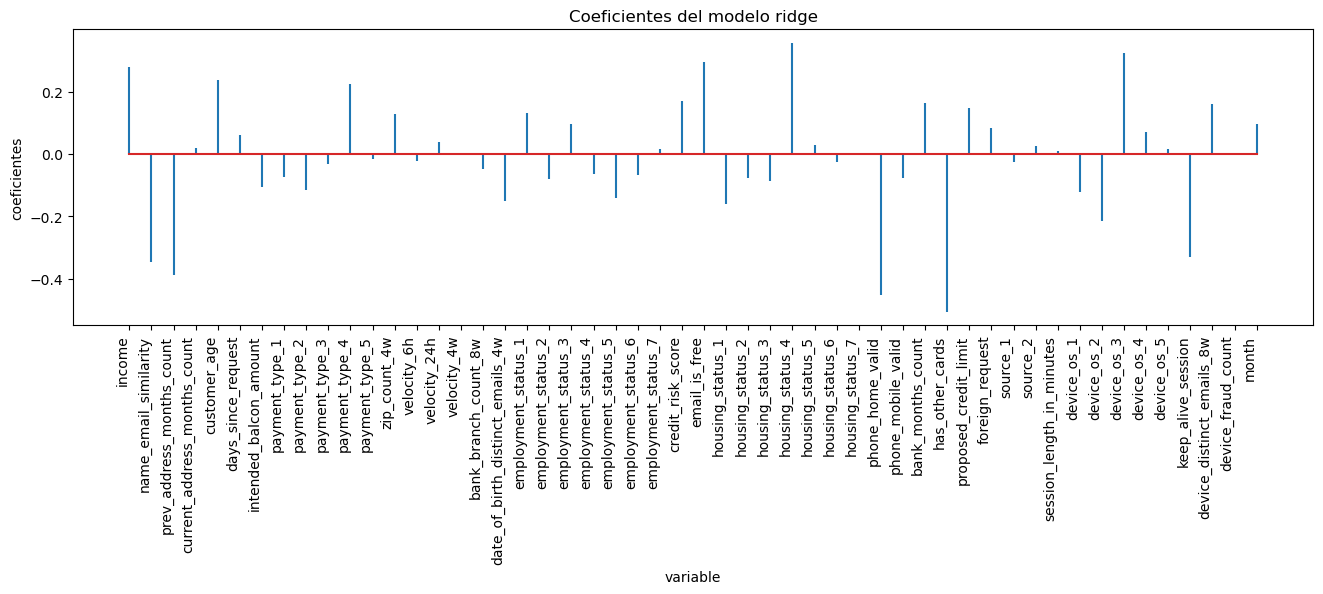

In [ ]:
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train_scaled.columns,
                         'coef': sel_ridge.estimator_.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(16, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo ridge');

In [ ]:
sel_ridge.get_support()
selected_feat = X_train_scaled.columns[sel_ridge.get_support()]
selected_feat

Index(['income', 'name_email_similarity', 'prev_address_months_count',
       'current_address_months_count', 'customer_age', 'days_since_request',
       'intended_balcon_amount', 'payment_type_1', 'payment_type_2',
       'payment_type_3', 'payment_type_4', 'payment_type_5', 'zip_count_4w',
       'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status_1',
       'employment_status_2', 'employment_status_3', 'employment_status_4',
       'employment_status_5', 'employment_status_6', 'employment_status_7',
       'credit_risk_score', 'email_is_free', 'housing_status_1',
       'housing_status_2', 'housing_status_3', 'housing_status_4',
       'housing_status_5', 'housing_status_6', 'housing_status_7',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request',
       'source_1', 'source_2', 'session_length_in_minutes', 'device_os_1

In [ ]:
print('total features: {}'.format((X_train_scaled.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 52
selected features: 51


# Regulación Lasso

In [ ]:
#sel_lasso = SelectFromModel(LogisticRegression(C=1, penalty='l1', 
#                                          solver='liblinear'), threshold = 0.08) # jugar con el threshold
#sel_lasso.fit(X_train_scaled, y_train)

#tarda

#quiere hacer un plot_importance, hay que hacer el lasso a lo bestia para sobreajustar y luego hacer el plot. Se hace con el dataset entero para
#eliminar variables (seleccion de variables).

In [ ]:
sel_lasso.get_support()
selected_feat_lasso = X_train_scaled.columns[sel_lasso.get_support()]
selected_feat_lasso

NameError: name 'sel_lasso' is not defined

In [ ]:
print('total features: {}'.format((X_train_scaled.shape[1])))
print('selected features: {}'.format(len(selected_feat_lasso)))

total features: 52


NameError: name 'selected_feat_lasso' is not defined

In [ ]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes_lasso = pd.DataFrame(
                        {'predictor': X_train_scaled.columns,
                         'coef': sel_lasso.estimator_.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(16, 3.84))
ax.stem(df_coeficientes_lasso.predictor, df_coeficientes_lasso.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo lasso');

NameError: name 'sel_lasso' is not defined

# 2. RFE

In [ ]:
# feature extraction
#model = DecisionTreeClassifier()
# model = RandomForestClassifier()
#rfe = RFE(model, n_features_to_select=35) #verbose=1 para ver iterativamente que pasa,
# n_features_to_select: por defecto se selecciona la mitad si no pones este parámetro , n_features_to_select=30
#fit = rfe.fit(X_train_scaled, y_train)


#print("Num Features: %d" % fit.n_features_)
#print("Selected Features: %s" % fit.support_)
#print("Feature Ranking: %s" % fit.ranking_)
#tarda


In [ ]:
print(len(X_train_scaled.columns[fit.support_]), len(X_train_scaled.columns))

35 53


In [ ]:
X_train_scaled.columns[fit.support_]

NameError: name 'fit' is not defined

# 3. Boruta

In [ ]:
import numpy as np

# Reemplazar np.int por int en tiempo de ejecución
np.int = int

# Importar la biblioteca boruta después de la modificación
from boruta import BorutaPy

# Restaurar np.int a su estado original después de la importación
np.int = np.int_

In [ ]:
import numpy as np

# Reemplazar np.int por int en tiempo de ejecución
np.float = float

# Importar la biblioteca boruta después de la modificación
from boruta import BorutaPy

# Restaurar np.int a su estado original después de la importación
np.float = np.float_

In [ ]:
#from boruta import BorutaPy

# Create the Boruta feature selection model
#boruta_model = BorutaPy(RandomForestClassifier(), n_estimators='auto', verbose=2)

# Fit the model to the training data
#boruta_model.fit(X_train_t.values, y_train.values)

# Get the selected features
#selected_features = X_train_t.columns[boruta_model.support_].tolist()

# Print the selected features
#print("Selected Features:")
#print(selected_features)

#tarda un huevo

In [ ]:
# sampling in proportion to y labels
rf = RandomForestClassifier(n_jobs=-1, max_depth=5) # cambiar los hiperparametros

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features - 5 features should be selected
feat_selector.fit(X_train_t.values, y_train.values) # Importante poner el .values al dataframe, sino dará error

# check selected features - first 5 features are selected
feat_selector.support_

# check ranking of features
feat_selector.ranking_

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
selected_feat_boruta = X_train_scaled.columns[feat_selector.support_]
selected_feat_boruta

# Probar el modelo con las nuevas variables seleccionadas

In [ ]:
X_train_t = X_train_t[selected_feat_boruta]
X_test_t = X_test_t[selected_feat_boruta]

In [ ]:
classifiers = [
    RandomForestClassifier(),
    GradientBoostingClassifier()
    #usar otros parametros
    ]# estudiar los hiperparametros y usar cualquier modelo aprendido

for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_train_t, y_train)   
    print(classifier)
    print("model score: %.3f" % pipe.score(X_test_t, y_test))

#si nos da un model score alto revisarlo porque igual hemos hecho algo mal (cuanto mas alto mejor, no es normal que hagamos algo bien jaja)

In [ ]:
clf = GradientBoostingClassifier(
              learning_rate=0.1,  max_depth=12,
              min_weight_fraction_leaf=0.02, n_estimators=130,
              random_state=2408,
              verbose=1)
clf.fit(X_train_t,y_train)

In [ ]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(12, 20))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train_t.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
pred_test = clf.predict_proba(X_test_t)
pred_train = clf.predict_proba(X_train_t)

# Curva roc

In [ ]:
# keep probabilities for the positive outcome only
yhat_train = pred_train[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat_train)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='xgb')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()


In [ ]:
# calculate AUC
auc = roc_auc_score(y_train, yhat_train)
print('AUC: %.3f' % auc)

In [ ]:
# keep probabilities for the positive outcome only
yhat = pred_test[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='xgb')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:
# calculate AUC
auc = roc_auc_score(y_test, yhat)
print('AUC: %.3f' % auc)

In [ ]:
# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_test, yhat)
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Random Forest')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

In [ ]:
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)

# <font color = 'lightgreen'> GLM 

El GLM (Modelo Linear Generalizado) es una generalización flexible de la regresión lineal ordinaria que permite variables de respuesta que tienen modelos de distribución de errores distintos de una distribución normal. El GLM generaliza la regresión lineal al permitir que el modelo lineal esté relacionado con la variable de respuesta a través de una función de enlace y al permitir que la magnitud de la varianza de cada medición sea una función de su valor predicho. Son una extensión de los modelos lineales tradicionales que permiten la especificación de distribuciones de probabilidad más generales y relaciones no lineales entre las variables dependientes e independientes. En este caso se trabaja con el train:

In [ ]:
import statsmodels.api as sm

# Definir variables predictoras (X) y variable objetivo (y)
# Aquí asumiré que 'X' son todas las columnas excepto 'fraud_bool'
X = bf_train.drop('fraud_bool', axis=1)
y = bf_train['fraud_bool']

# Agregar una constante a las variables predictoras (intercepto)
X = sm.add_constant(X)

# Ajustar un modelo de regresión logística
model = sm.GLM(y, X, family=sm.families.Binomial())
result = model.fit()

# Imprimir resumen del modelo
print(result.summary())

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

# <font color = 'lightgreen'> BAYES

El modelo Naive Bayes hace la suposición de que las características son independientes dadas las clases, lo que simplifica la fórmula y los cálculos.El clasificador Naive Bayes se basa en el teorema de Bayes, que se utiliza para calcular las probabilidades condicionales de las clases dados los datos de entrada. A pesar de su simplicidad y la asunción de independencia condicional, los clasificadores Naive Bayes a menudo funcionan sorprendentemente bien en una variedad de problemas del mundo real, especialmente en problemas de clasificación de texto.

Scikit-learn implementa varios clasificadores Naive Bayes.

### Gaussian Naive Bayes (GaussianNB):

En el caso de Gaussian Naive Bayes, se asume que las características siguen una distribución normal (gaussiana). Esto significa que el modelo estima los parámetros de la distribución normal para cada clase y cada característica (media y desviación estándar).

### Multinomial Naive Bayes (MultinomialNB):
Frecuentemente utilizado en clasificación de texto.En el caso de Multinomial Naive Bayes, se asume que las características representan recuentos o frecuencias de ocurrencia de eventos discretos, como recuentos de palabras en documentos. Este modelo estima las probabilidades de ocurrencia de cada palabra para cada clase.

### Complement Naive Bayes:
El Complement Naive Bayes es una variante del clasificador Naive Bayes que está diseñada para abordar el problema del desequilibrio de clases. Mientras que el clasificador Naive Bayes estándar asume independencia condicional entre las características dadas las clases, el Complement Naive Bayes se introdujo para mejorar el rendimiento en conjuntos de datos desequilibrados.La idea detrás del Complement Naive Bayes es que, al considerar la información de todas las demás clases al calcular las probabilidades, se mejora la capacidad del modelo para manejar clases minoritarias. Esto es especialmente útil en situaciones donde hay clases con pocos ejemplos en comparación con las clases mayoritarias.

### Bernoulli Naive Bayes (BernoulliNB):

En el caso de Bernoulli Naive Bayes, se asume que las características son variables binarias, es decir, toman valores de 0 o 1. Este modelo estima las probabilidades de ocurrencia de 0 o 1 para cada característica y cada clase.

### Categorical Naive Bayes:
El clasificador Categorical Naive Bayes es adecuado cuando las características son categóricas y no numéricas, lo que significa que no tiene sentido calcular la media y la desviación estándar como en el caso de Gaussian Naive Bayes. Este clasificador es útil en problemas donde las características son variables categóricas, como en encuestas donde las respuestas son categorías discretas.

In [1]:
from sklearn.datasets import load_iris
 from sklearn.model_selection import train_test_split
 from sklearn.naive_bayes import GaussianNB
 X, y = load_iris(return_X_y=True)
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
 gnb = GaussianNB()
 y_pred = gnb.fit(X_train, y_train).predict(X_test)
 print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

IndentationError: unexpected indent (3487682276.py, line 2)

## <font color='lightgreen'> SUPPORT VECTOR MACHINE (SVM)

El SVM es un conjunto de algoritmos de aprendizaje supervisado, que resuelve problemas de clasificación y regresión. Se parte de un problema binario, en nuestro caso si existe fraude (1) o no (0), de nuestra variable target 'fraud_bool'. Dicho problema binario debe ser linealmente separable. Cuantas más variables más difícil es. 

Para entenderlo de manera más clara, un ejemplo podría ser el de crear una línea en una ubicación cualquiera e ir moviéndola hasta encontrar el menor posible. Hay que mencionar que es una línea en un plano de dos dimensiones (x,y), pero eso no significa que en el espacio sea una línea, ya que puede ser un plano o cualquier figura geométrica cuando lo observamos desde un plano de tres, cuatro, etc. dimensiones.

Los "support Vectors" son los puntos que se encuentran en las líneas discontinuas (azul y rosa). La línea negra sería la más óptima, donde el error es el menor entre ambas variables. Se sitúa a la misma distancia de las rectas azul y rosa, de manera que si salen nuevos puntos no salgan en la otra zona. Hay que dejar un margen amplio para no aumentar el error. 

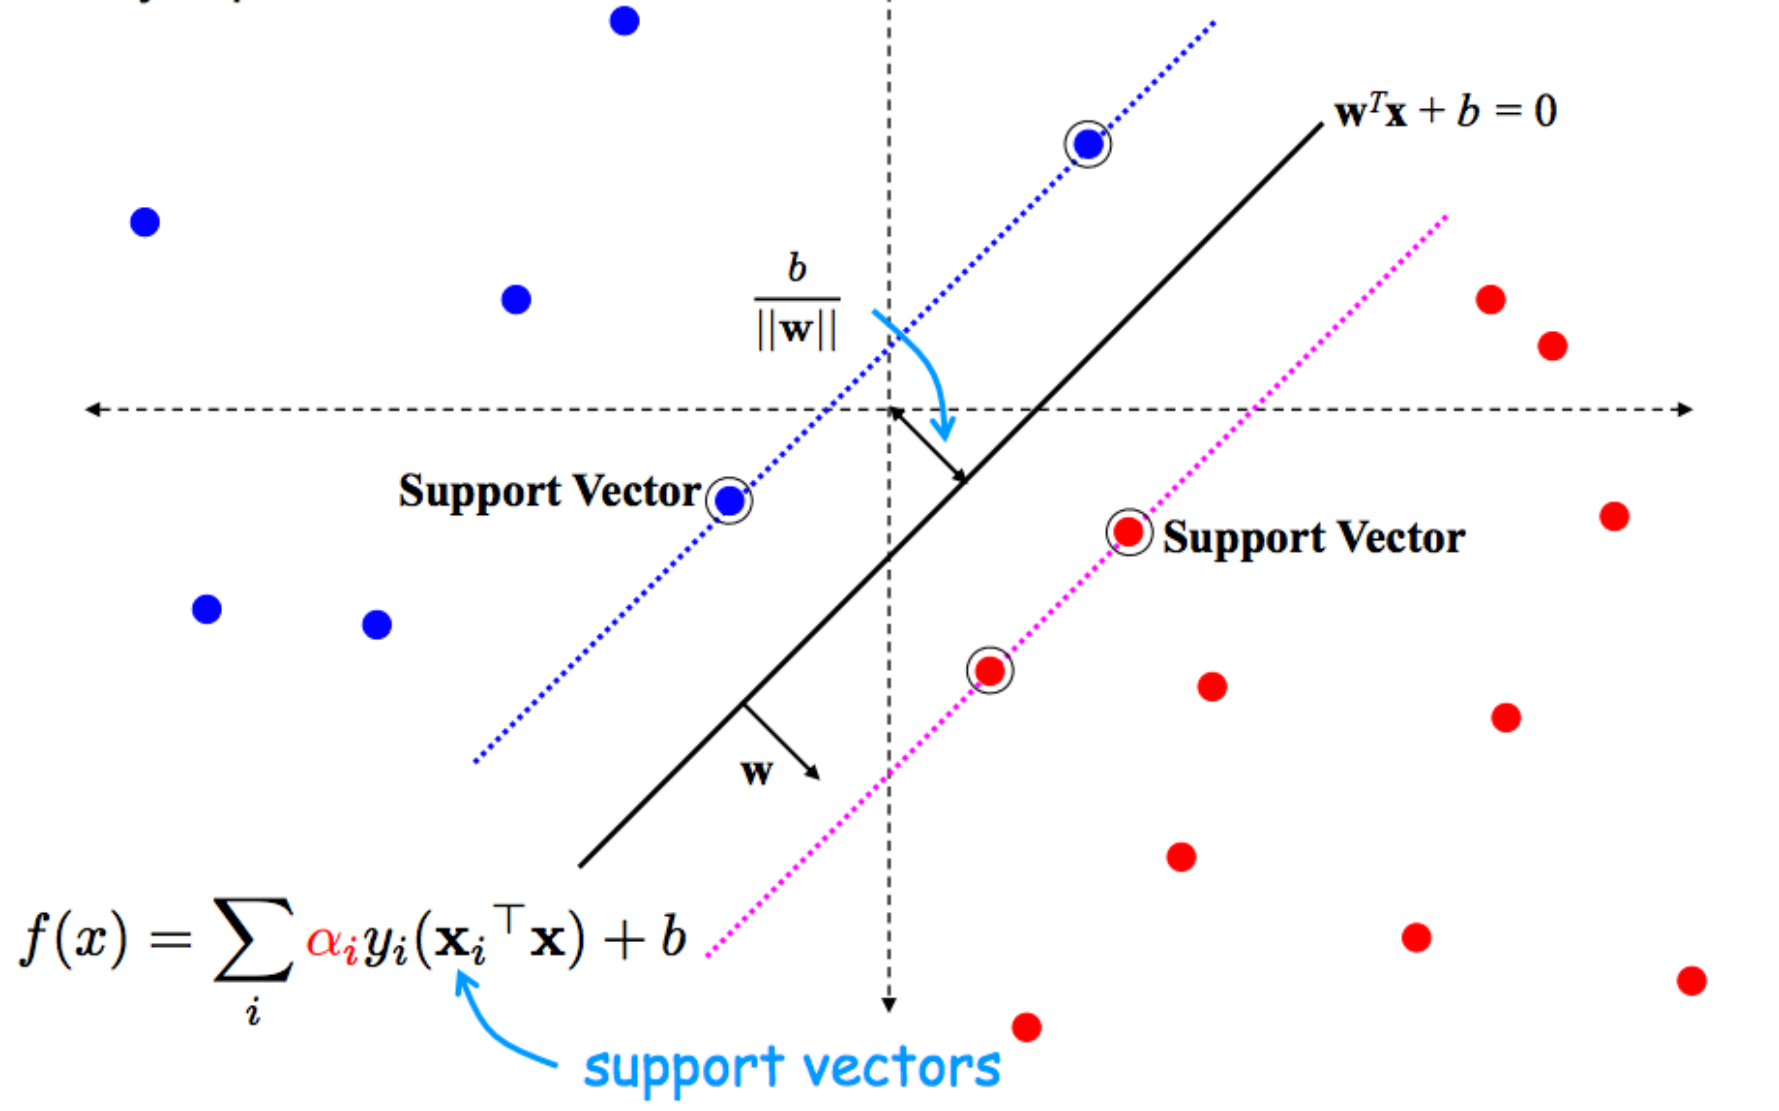

Al ejecutar este código para la creación del SVC, observamos que se queda ejecutando y no termina nunca, por lo que elegiremos una parte del test (un 10%) para probarlo con eso. 
 
En nuestro trabajo intentaremos observar el accuracy o la precisión de dicha recta:

In [37]:
from sklearn.model_selection import train_test_split

X_test_subset, _, y_test_subset, _ = train_test_split(X_test, y_test, test_size=0.1, random_state=0)

#no va lo de abajo

In [38]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm = SVC()

# Train the SVM classifier
svm.fit(X_train_t, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test_subset)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test_subset, y_pred)
print("Accuracy:", accuracy)